In [22]:
from pyspark.sql import SQLContext
import seaborn as sn
import matplotlib.pyplot as plt 

In [23]:
sqlContext = SQLContext(sc)
d = sqlContext.read.load("home/ICC/Desktop/Downloads/insurance.csv",
                         format="com.databricks.spark.csv",header=True,inferSchema=True)

In [12]:
d.count()

1338

In [13]:
d.describe()
d1 = d.toPandas()

In [14]:
d1.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Visualization of Data


+------+-----+
|smoker|count|
+------+-----+
|    no| 1064|
|   yes|  274|
+------+-----+



<AxesSubplot:xlabel='children', ylabel='charges'>

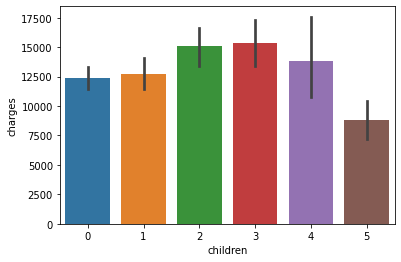

In [47]:
d.groupby('smoker').count().show()
#dx = d.toPandas()
sn.barplot(x='children',y='charges', data=d1)


<AxesSubplot:xlabel='region', ylabel='charges'>

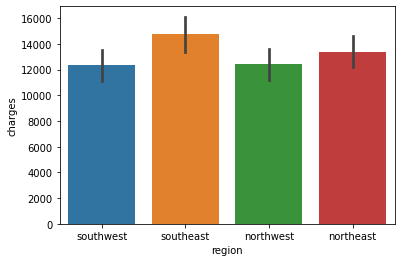

In [48]:
sn.barplot(x='region',y='charges', d=d1)

Text(0.5, 1.0, 'Age Vs charges')

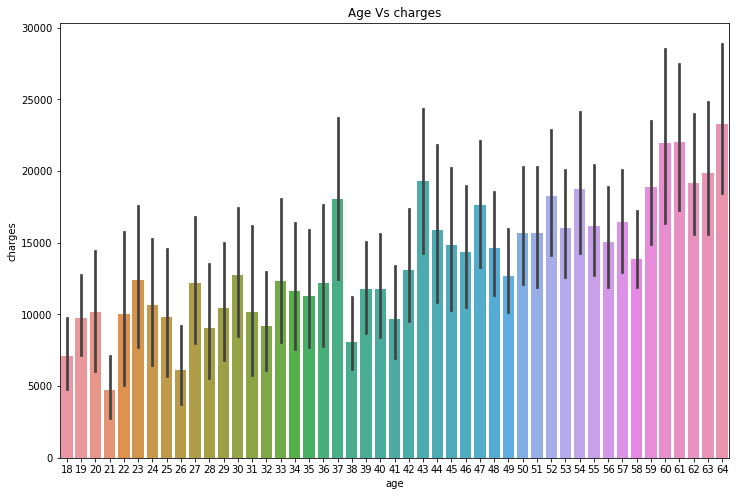

In [49]:
plt.figure(figsize=(12,8))
sn.barplot(x='age',y='charges', d=d1)
plt.title('Age Vs charges')

In [50]:
clean_val = {"sex": {"male":1,"female":2} , "smoker": {"yes":1,"no":0}}
d1 = d1.replace(clean_val) # replacing all the useful categorical values
#d1.head(5)
df=spark.createDataFrame(d1)
df.head(5)

[Row(age=19, sex=2, bmi=27.9, children=0, smoker=1, region='southwest', charges=16884.924),
 Row(age=18, sex=1, bmi=33.77, children=1, smoker=0, region='southeast', charges=1725.5523),
 Row(age=28, sex=1, bmi=33.0, children=3, smoker=0, region='southeast', charges=4449.462),
 Row(age=33, sex=1, bmi=22.705, children=0, smoker=0, region='northwest', charges=21984.47061),
 Row(age=32, sex=1, bmi=28.88, children=0, smoker=0, region='northwest', charges=3866.8552)]

In [51]:
from pyspark.sql.functions import col
finaldf=df.drop(df.region)
finaldf.printSchema()

root
 |-- age: long (nullable = true)
 |-- sex: long (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: long (nullable = true)
 |-- smoker: long (nullable = true)
 |-- charges: double (nullable = true)



In [52]:
#Checking Null Values
from pyspark.sql.functions import col
for i in finaldf.columns:
    print(finaldf.where(col(i).isNull()).count())


0
0
0
0
0
0


In [53]:
features = ['age', 'sex', 'bmi', 'children', 'smoker']
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=finalDF.columns,
    outputCol="features")

output = assembler.transform(finalDF).select('features','charges')

In [54]:
train,test = output.randomSplit([0.75, 0.25])

In [55]:
train.show()

+--------------------+----------+
|            features|   charges|
+--------------------+----------+
|[18.0,1.0,15.96,0...| 1694.7964|
|[18.0,1.0,23.75,0...| 1705.6245|
|[18.0,1.0,29.37,1...| 1719.4363|
|[18.0,1.0,31.68,2...|34303.1672|
|[18.0,1.0,34.1,0....|  1137.011|
|[18.0,1.0,34.43,0...| 1137.4697|
|[18.0,2.0,26.315,...|2198.18985|
|[18.0,2.0,26.73,0...| 1615.7667|
|[18.0,2.0,30.115,...|21344.8467|
|[18.0,2.0,36.85,0...|36149.4835|
|[18.0,2.0,38.28,0...| 1631.8212|
|[18.0,2.0,38.665,...|3393.35635|
|[19.0,1.0,20.425,...|1625.43375|
|[19.0,1.0,20.9,1....|  1832.094|
|[19.0,1.0,24.6,1....|  1837.237|
|[19.0,1.0,25.555,...|1632.56445|
|[19.0,1.0,27.7,0....| 16297.846|
|[19.0,1.0,28.4,1....|  1842.519|
|[19.0,1.0,34.1,0....|  1261.442|
|[19.0,1.0,34.8,0....| 34779.615|
+--------------------+----------+
only showing top 20 rows



In [56]:
test.show()

+--------------------+-----------+
|            features|    charges|
+--------------------+-----------+
|[18.0,1.0,17.29,2...| 12829.4551|
|[18.0,1.0,22.99,0...|  1704.5681|
|[18.0,1.0,25.175,...|15518.18025|
|[18.0,1.0,33.77,1...|  1725.5523|
|[18.0,2.0,35.625,...| 2211.13075|
|[19.0,1.0,20.615,...| 2803.69785|
|[19.0,1.0,29.07,0...| 17352.6803|
|[19.0,1.0,30.59,0...|  1639.5631|
|[19.0,1.0,31.92,0...| 33750.2918|
|[19.0,2.0,17.8,0....|   1727.785|
|[20.0,1.0,28.025,...|17560.37975|
|[20.0,2.0,22.42,0...| 14711.7438|
|[20.0,2.0,28.785,...| 2457.21115|
|[20.0,2.0,28.975,...| 2257.47525|
|[20.0,2.0,37.0,5....|    4830.63|
|[22.0,2.0,24.3,0....|   2150.469|
|[22.0,2.0,28.05,0...|  2155.6815|
|[23.0,1.0,23.845,...| 2395.17155|
|[23.0,1.0,34.4,0....|   1826.843|
|[23.0,2.0,36.67,2...| 38511.6283|
+--------------------+-----------+
only showing top 20 rows



# Model

In [58]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator


featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(output)
dt = DecisionTreeRegressor(featuresCol="features",labelCol='charges')
pipeline = Pipeline(stages=[featureIndexer, dt])
model = pipeline.fit(train)


predictions = model.transform(test)




In [59]:
predictions.select("prediction", "charges", "features").show(5)
evaluator = RegressionEvaluator(
    labelCol="charges", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+------------------+-----------+--------------------+
|        prediction|    charges|            features|
+------------------+-----------+--------------------+
|12584.726376935483| 12829.4551|[18.0,1.0,17.29,2...|
|1757.6029391304346|  1704.5681|[18.0,1.0,22.99,0...|
|16148.382882222222|15518.18025|[18.0,1.0,25.175,...|
|1757.6029391304346|  1725.5523|[18.0,1.0,33.77,1...|
|1757.6029391304346| 2211.13075|[18.0,2.0,35.625,...|
+------------------+-----------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 878.971
